# Task 1 - Prediction using Supervised ML

## Author:Mansi Sharma


__Data Science & Business Analytics Intern at The Spark Foundation__


__Aim__ :Predict the percentage of students based on no. of study hours using Linear Regression and also predict the score if a student studies for 9.25 hours per day.



__Linear Regression with Python Scikit Learn__

In this task we will see how the Python Scikit-Learn(sklearn) library for machine learning can be used to implement regressions. We will start with simple linear regression involving two variables.

__Dataset__

The given dataset has two Columns, one contains no.of study hours and the other one contains the marks scored by him. The dataset can be found at http://bit.ly/w-data

__Importing Required Libraries__

In [1]:
import pandas as pd     
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

__Loading the dataset__

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")  
print("Successfully imported data ")  

Successfully imported data 


__Understanding data__

In [3]:
#first 10 rows of data.
data.head(10) 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#description of data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#the shape of data
data.shape

(25, 2)

In [6]:
#information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


__Data visualization__

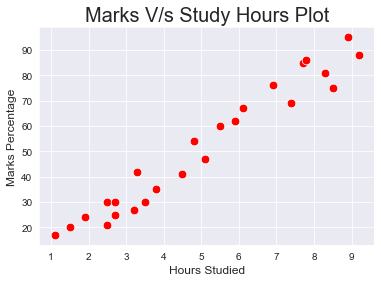

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(x=data['Hours'], y=data['Scores'], color='red',s=75)
plt.title('Marks V/s Study Hours Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

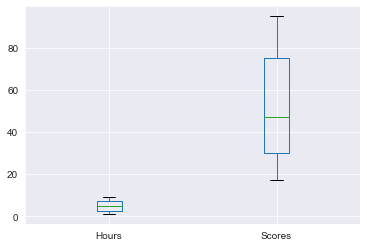

In [8]:
data.plot.box()
plt.show()

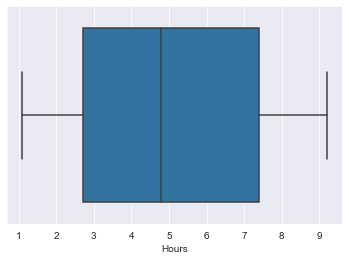

In [9]:
sns.boxplot(data['Hours'])
plt.show()


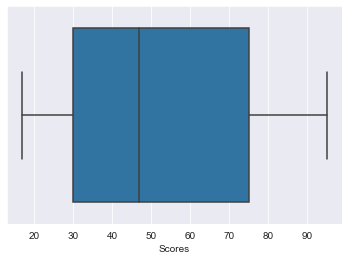

In [10]:
sns.boxplot(data['Scores'])
plt.show()

__From the above plotes correlation is observed between Marks and Hours Studied.Lets plot a regression line to confirm the correlation.__

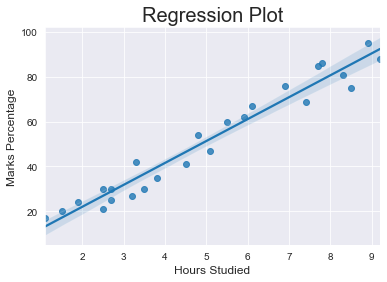

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

__It is confirmed that the variables are positively correlated.__

## Training the Model

__1) Dividing the data into values and labels__

In [12]:
# Defining X and y from the Data
x = data.iloc[:, :-1].values  
#x represents the array of values in "Hours" column of the data 
y = data.iloc[:, 1].values
#y represents the array of values in "Scores" column of the data

In [13]:
# Spliting the Data in two from sklearn.model_selection import train_test_split and we have chosen 20%  for testing purpose and remaining 80% for training purpose.    
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

__2) Fitting the Data into the model__

In [14]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training OF MODEL completed")

Training OF MODEL completed


__Plotting Test Data using the Trained Dataset__

Slope is: [9.91065648]
Intercept is: 2.018160041434683


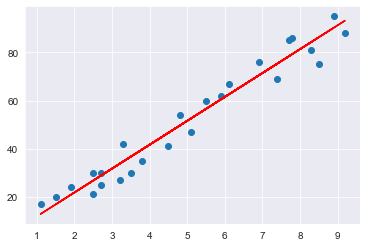

In [15]:
#Plotting the regression line
line = regressor.coef_*x+regressor.intercept_
print("Slope is:",regressor.coef_)
print("Intercept is:",regressor.intercept_)

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,color='red');
plt.show()

In [16]:
print('Train Score')
print(regressor.score(x_train,y_train))
  

Train Score
0.9515510725211552


In [17]:
print('Test Score')
print(regressor.score(x_test,y_test))

Test Score
0.9454906892105356


### Making Prediction Of Percentage of Marks

In [18]:
#Now that we have trained our algorithm with good score, it's time to make some predictions.
y_pred = regressor.predict(x_test)
y_pred
#Predicting scores of testing data of hours on the basis of our trained model

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

### Comparing Actual vs Predicted

In [19]:
#Comparing the actual y_test set and predicted y_pred data we get
data = pd.DataFrame({'Actual': y_test, 'predicted': y_pred, 'Difference/Error': y_test - y_pred})
data

,Actual,predicted,Difference/Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


__The predicted score if a student studies for 9.25 hrs/ day.__

In [20]:
print("Predicted score if a student studies for 9.25 hours/day ",regressor.predict([[9.25]]))

Predicted score if a student studies for 9.25 hours/day  [93.69173249]


## Evaluating the algorithm

In [21]:
# mean_absolute_error:It measures the average magnitude of the errors in a set of predictions, without considering their direction.
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))

Mean Absolute Error :  4.183859899002975


In [22]:
# mean_squared_error:It measures the average squared difference between the estimated values and the actual value.
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

Mean Squared Error ( MSE Value) : 21.5987693072174


In [23]:
# Root mean_squared_error:It measures the square root of the average of squared differences between prediction and actual observation.
print("Mean Squared Error ( RMSE Value) :",mean_squared_error(y_test, y_pred, squared=False))


Mean Squared Error ( RMSE Value) : 4.6474476121003665


In [24]:
#R2_Score:It provides an indication of goodness of fit 
print("Prediction Score : ", r2_score(y_test, y_pred))

Prediction Score :  0.9454906892105356


In [25]:
a=metrics.r2_score(y_test,y_pred)
print('accuracy of model is',a)

accuracy of model is 0.9454906892105356
